***
***

<h2><center><font color='blue'>Cours n°3</font></center> </h2>

<h2><center>Cas d'usages en NLP</center> </h2>

***
***

***
# <font color='blue'> 1. Annotation de données textuelles </font>
***

Dans la majorité des projets de NLP, il est nécessaire de disposer d’un jeu de données annoté manuellement par les experts (données d’apprentissage) afin de mettre en place des algorithmes capables de reproduire automatiquement cette labélisation sur d’autres données non labélisées.

Cette tâche peut être fastidieuse si nous n’utilisons pas des outils adaptés. Il est donc nécessaire de mettre en place un outil spécialement conçu. Il existe différents outils d’annotations présents sur le marché.


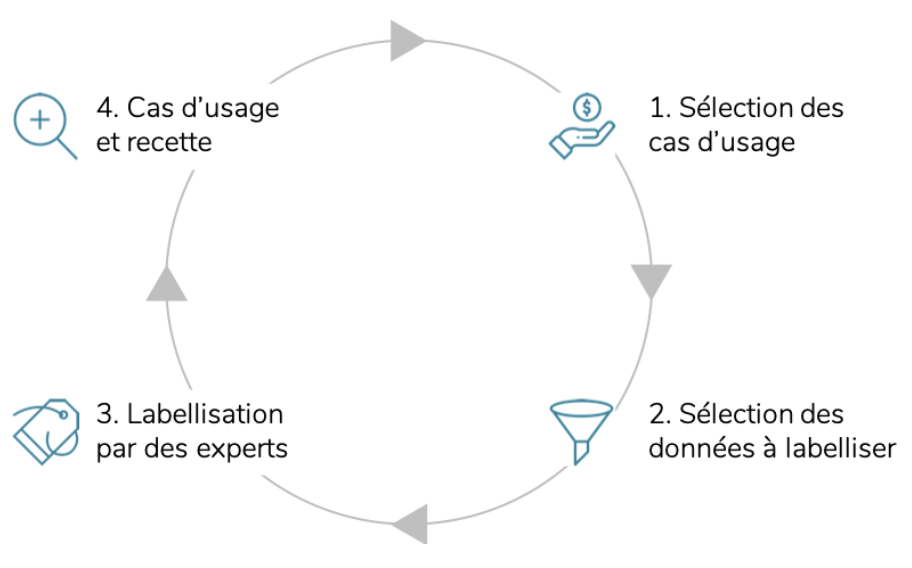

## 1.1. Brat

https://brat.nlplab.org/
    
Brat est l'un des outils les plus populaires pour l'annotation manuelle de documents et a été utilisé pour le développement de divers corpus. Brat doit être installé localement car il n'est pas disponible en ligne. Le schéma est configuré dans un fichier texte brut et les documents sont importés dans le même format. Les annotations peuvent être exportées dans un format de texte brut similaire. La mise en évidence d'entités et de relations est possible, ainsi que la normalisation à des terminologies prédéfinies. Bien que la dernière version ait été publiée en 2012, l'outil est toujours disponible et est populaire dans le domaine.

## 1.2. Webanno

https://webanno.github.io/webanno/
    
Webanno est un outil d'annotation très populaire qui fournit des fonctionnalités complètes pour les annotations sémantiques et syntaxiques. WebAnno permet l'importation de schémas et de documents et l'exportation d'annotations dans une variété de formats. L'outil fonctionne avec des étiquettes pour diverses annotations syntaxiques et sémantiques. WebAnno fournit un support pour les utilisateurs. C'est l'un des outils les plus complets, mais son utilisation n'est pas très intuitive (en raison de ses différentes couches d'annotations). Cependant, la documentation est bonne et couvre la plupart des sujets importants.   

## 1.3. Doccano

https://doccano.herokuapp.com/

https://github.com/doccano/doccano
    
Outil d'annotation textuelle open-source. Il fournit entre autres des fonctionnalités d'annotation pour la classification du texte et l'étiquetage de séquence. Doccano peut être déployé sur Azure (Web App for Containers + base de données PostgreSQL) et offre la possibilité d’importer et exporter des données au format CSV et JSON.

## 1.4. Prodigy

https://prodi.gy/
    
Outil d’annotation et d’apprentissage automatique. Il est souvent utilisé pour la reconnaissance d'entités, la détection d'intention ou la classification d'images. Il rassemble des informations de pointe sur l’apprentissage automatique et l’expérience utilisateur. Toutefois, c’est un outil payant.

***
# <font color='blue'> 2. Classification supervisée de textes </font>
***

Il s’agit ici d’attribuer automatiquement une ou plusieurs catégories à des données textuelles : paragraphes ou documents. L’objectif est de regrouper ensembles des textes similaires.

On parle de modèles supervisés car ils se basent sur un historique de données déjà catégorisées (on parlera d’un corpus d’apprentissage annoté, c’est à dire une base de documents annotés manuellement par des experts métiers). Une fois entrainés sur ces données, ils peuvent être appliqués sur de nouveaux textes pour prédire la ou les catégories auxquels ils appartiennent. 

La construction de cette base de données se fait grâce à un outil d’annotation.

In [ ]:
import pandas as pd

path_csv = "C:/Users/thoma/Documents/NLP_ESME/Data/Corona_NLP_train.csv"
df = pd.read_csv(path_csv, delimiter = ',', encoding='Latin-1', usecols=[4,5])
df.shape

In [ ]:
df.head(10)

In [ ]:
df.groupby('Sentiment').count()['OriginalTweet'].sort_values(ascending=False)

In [ ]:
print(df.Sentiment.loc[7])
df.OriginalTweet.loc[7]

In [ ]:
print(df.Sentiment.loc[3])
df.OriginalTweet.loc[3]

In [ ]:
print(df.Sentiment.loc[9])
df.OriginalTweet.loc[9]

In [ ]:
print(df.Sentiment.loc[4])
df.OriginalTweet.loc[4]

In [ ]:
print(df.Sentiment.loc[11])
df.OriginalTweet.loc[11]

## 2.1. Etape 1 : Prétraitements des données textuelles


Cette étape nécessaire permet de nettoyer les documents avant les traitements IA. Elle permet d'uniformiser le texte, d'éviter de travailler avec un vocabulaire trop grand (comportant des termes non pertinents). Les opérations de pré-traitement consisteront à « tokeniser » (découper le texte mots par mots), puis, en fonction du cas d’usage, supprimer l’accentuation, la ponctuation et les « stop words » (les mots trop peu fréquents ou les mots beaucoup trop fréquents), convertir le texte en minuscule, appliquer un « stemming », etc...

Par ailleurs, il est parfois nécessaire de réaliser une étape de feature engineering afin de construire de nouvelles variables explicatives. Enfin, c’est aussi à cette étape que nous traiterons d’éventuelles données manquantes ou aberrantes.

CF Cours <b> 03 - ESME - Biotech & Numérique - CM2 - Pré-traitements de corpus et représentations numériques de textes


In [ ]:
from gensim import utils
import gensim.parsing.preprocessing as gsp
import re

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
#           gsp.stem_text
          ]

def clean_text(s):
    s = re.sub(r"http\S+", "", s)
#    s = re.sub(r"#\S+", "", s)
    s = re.sub(r"@\S+", "", s)
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [ ]:
df["CleanedTweet"] = df.OriginalTweet.apply(lambda x: clean_text(x))

In [ ]:
df.head(5)

In [ ]:
df[df.CleanedTweet == '']

In [ ]:
import numpy as np
df = df.replace(r'^\s*$', np.NaN, regex=True).dropna() 

In [ ]:
df

## 2.2. Etape 2 : Classification de texte - Approche Machine Learning


Il est conseillé de commencer par modéliser la classification à l’aide d’algorithmes de Machine Learning (plutôt que les modèles de Deep Learning) car ils sont plus rapides et moins coûteux à mettre en place (leur temps d’apprentissage est plus court et les ressources allouées sont moins importantes), et atteignent parfois des performances proches de celles du Deep Learning (en termes de qualité des prédictions), enfin, leur impact environnemental est bien plus faible (Thompson et al. 2020).

Cette 1ère approche constitue une baseline. Elle permet d’obtenir rapidement des résultats que nous challengeons par la suite.


***

### a. Représentation vectorielle des données textuelles

CF Cours <b> 03 - ESME - Biotech & Numérique - CM2 - Pré-traitements de corpus et représentations numériques de textes


In [ ]:
df_x = df['OriginalTweet']

#### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator

class Text2TfIdfTransformer(BaseEstimator):

    def __init__(self):
        self._model = TfidfVectorizer(max_df=0.5, min_df=50)
        pass

    def fit(self, df_x, df_y=None):
        df_x = df_x.apply(lambda x : clean_text(x))
        self._model.fit(df_x)
        return self

    def transform(self, df_x):
        return self._model.transform(df_x)
    
tfidf_transformer = Text2TfIdfTransformer()
tfidf_vectors = tfidf_transformer.fit(df_x).transform(df_x)

In [ ]:
tfidf_vectors.shape

***

#### Doc2Vec

In [ ]:
%%capture

from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from sklearn.base import BaseEstimator
from sklearn import utils as skl_utils
from tqdm import tqdm

import multiprocessing
import numpy as np

class Doc2VecTransformer(BaseEstimator):

    def __init__(self, vector_size=200, learning_rate=0.02, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self._model = None
        self.vector_size = vector_size
        self.workers = multiprocessing.cpu_count() - 1

    def fit(self, df_x, df_y=None):
        tagged_x = [TaggedDocument(clean_text(row).split(), [index]) for index, row in enumerate(df_x)]
        model = Doc2Vec(documents=tagged_x, vector_size=self.vector_size, workers=self.workers)

        for epoch in range(self.epochs):
            model.train(skl_utils.shuffle([x for x in tqdm(tagged_x)]), total_examples=len(tagged_x), epochs=1)
            model.alpha -= self.learning_rate
            model.min_alpha = model.alpha

        self._model = model
        return self

    def transform(self, df_x):
        return np.asmatrix(np.array([self._model.infer_vector(clean_text(row).split())
                                     for index, row in enumerate(df_x)]))


doc2vec_trf = Doc2VecTransformer()
doc2vec_features = doc2vec_trf.fit(df_x).transform(df_x)

In [ ]:
doc2vec_features.shape

***

#### FastText

In [ ]:
import fasttext.util
import fasttext
import numpy as np
fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')
ft.get_dimension()

In [ ]:
FastText_vect = np.matrix([ft.get_sentence_vector(text) for text in df['CleanedTweet']])

In [ ]:
FastText_vect.shape

### b. Classification

Après avoir transformé les données brutes en vecteurs numériques, on peut utiliser les algorithmes de Machine Learning pour la classification.

Pour traiter un problème multi-classe qui consiste à associer un seul label à chaque observation parmi un ensemble de n labels possibles (avec n > 2), l’approche la plus utilisée consiste à transformer le problème multi-classe en plusieurs problèmes binaires. Par exemple, la stratégie One-vs-Rest implique la création d'un classifieur binaire par classe, avec les échantillons de cette classe comme échantillons positifs et tous les autres échantillons comme négatifs. Cette stratégie exige que les classifieurs de base produisent un score de confiance à valeur réelle pour sa décision ; la classe prédite sera celle avec le score le plus élevé.

Pour les problèmes multi-label qui consiste à associer un ou plusieurs labels à chaque observation, la stratégie One-vs-rest peut également être utilisée, les classes prédites seront celles dont les scores de confiance associés à la prédiction de chaque classe seront supérieurs à un seuil.

Il existe de nombreux algorithmes de Machine Learning pour la classification:

- <b>Arbres de décision</b> : Cet algorithme va chercher à diviser récursivement et le plus efficacement possible les exemples de l’ensemble d’apprentissage par des tests définis à l’aide des attributs jusqu’à ce que l’on obtienne des sous-ensembles d’exemples ne contenant que des échantillons homogènes.

- <b>Régression Logistique</b> : Elle cherche une relation linéaire entre les variables explicatives et la variable cible en ayant recours à l’estimation par les moindres carrés (ou estimation par le maximum de vraisemblance).

- <b>Gradient Boosting</b> : L’idée principale est d’agréger plusieurs modèles (le plus souvent des arbres de décision simples) mais en les créant itérativement. Le modèle final est une pondération de ces “mini-modèles”, de sorte qu’à chaque prédiction, les modèles ayant prédit correctement auront un poids plus fort que ceux dont la prédiction est incorrecte. Des implémentations très performantes sont disponibles dans les librairies Python XGBoost, LightGBM ou encore CatBoost.

- <b>Random Forest</b> : C’est une méthode d’apprentissage ensembliste qui agrège les prédictions faites par de nombreux arbres de décision construits en parallèle.

- <b>Support Vector Machines (SVM)</b> : Cet algorithme repose sur deux idées clés qui permettent de traiter des problèmes de discrimination non linéaire, et de reformuler le problème de classement comme un problème d'optimisation quadratique. Cette approche a souvent été utilisée par StarClay pour la classification de textes car l’implémentation faite par LIBLINEAR qui utilise un kernel linéaire est très performante sur des vecteurs de grande dimension (comme ceux produit par les modèles vectoriels Tf-Idf).

Une implémentation de ces modèles est disponible en Python dans la librairie scikit-learn.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### Regression Logistique

In [ ]:
%%capture
log_reg = LogisticRegression(multi_class='multinomial',solver='newton-cg',max_iter=300)

scores = cross_val_score(log_reg, tfidf_vectors, df['Sentiment'], cv=10,scoring='accuracy')
y_pred = cross_val_predict(log_reg, tfidf_vectors, df['Sentiment'], cv=10)

In [ ]:
print('Accuracy for Tf-Idf & Logistic Regression: ', str(round(scores.mean(),2)) + ' +/- ' + str(round(scores.std(),2)))

In [ ]:
y_true = df['Sentiment']
tags = ['Extremely Negative','Negative','Neutral','Positive','Extremely Positive']
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=tags, index = tags)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt = 'd', annot_kws={"size": 12})# font size

***

## 2.3. Etape 2 bis : Classification de texte - Approche Deep Learning


La deuxième approche sera basée sur des algorithmes de Deep Learning qui représentent l'état de l'art pour la classification de textes. Les résultats de cette approche seront comparés à ceux de l’approche Machine Learning.


Gardons à l’esprit que le Deep Learning est une sous-partie du Machine Learning. La différence avec les méthodes classiques est qu’il s’appuie sur des réseaux de neurones artificiels profond (avec plusieurs couches). Ceux-ci permettent de capter plusieurs types d’effets croisés entre les variables et d’extraire automatiquement des caractéristiques que les modèles classiques ne peuvent pas simplement représenter ou alors qui nécessite un long travail de feature engineering. 

Pour construire ces réseaux de neurones profonds, nous utilisons les Framework PyTorch et Tensorflow.

Depuis 2018, les algorithmes basés sur des modèles de langages (Language Model en anglais) représentent l'état de l'art pour la classification de textes (ex : ULMFiT, ELMo, BERT ...). Au lieu d’associer un vecteur d’embedding statique à chaque mot (comme Word2vec ou Glove), ces méthodes construisent des représentations plus riches qui prennent en compte le contexte sémantique et syntaxique de chaque mot.

ELMo et ULMFiT sont basés sur des réseaux de neurones récurrents du type LSTM bidirectionnels qui tiennent compte de l’aspect séquentiel des mots dans une phrase (et des paragraphes dans un document) et qui sont donc particulièrement adaptés aux données textuelles. Mais ces réseaux ne sont pas facilement parallèlisables contrairement aux Transformers utilisés par BERT qui sont uniquement basés sur des mécanismes d’attention qui modélisent les dépendances entre les mots sans tenir compte de leur distance dans la séquence.

Architecture d’un modèle Transformer (Vaswani et al., Attention Is All You Need (2017)):


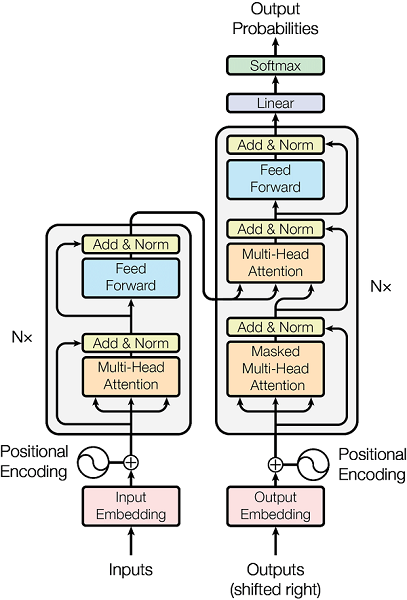

- <b>Tokenisation</b>

Les avantages des modèles types BERT et d'ULMFiT (depuis la version MultiFiT) reposent aussi sur le processus de « tokenization » utilisé pour prétraiter les phrases du texte à classifier. En effet, ils utilisent un tokenizer appelé SentencePiece subword qui découpe les phrases en un ensemble de mots, sous-mots et caractères en fonction de leur occurrence dans le corpus. Cela représente un avantage par rapport aux modèles basés sur un tokenizer qui travaille au niveau du mot : il est très rare de se retrouver avec un mot "hors du vocabulaire” d'apprentissage (Out-of-vocabulary en anglais) lors de l'application du modèle sur un nouveau texte.


De plus, le côté non déterministe de SentencePiece, permet de créer des modèles robustes au bruit. Ceci est intéressant dans le cas où les documents peuvent contenir des erreurs (ex. : erreur de saisie manuelle, ou bien, lorsque les données sont issues de documents scannés et que certains caractères sont erronés).

Le BPE-Dropout (Proviklov et al. 2019), très proche de la tokenization SentecePiece, est également capable de gérer les erreurs dans les mots. 


- <b>Transfer Learning</b>

Ces approches s’inscrivent dans le paradigme du « Transfer Learning » qui suppose de procéder en deux temps :
    
Phase 1 : On va d’abord effectuer un pré-entraînement de l’algorithme en apprenant à représenter le texte à l’aide une tâche auto-supervisée. (Par exemple, BERT utilise deux tâches de pré-entraînement : il masque une partie des mots et apprends à les retrouver afin d’acquérir une connaissance générale et bidirectionnelle du langage, il apprend aussi à reconnaître si deux phrases sont consécutives ou non).

Phase 2 : Dans un second temps, l’algorithme est spécialisé pour une tâche précise (ici la classification), c’est le fine-tuning. Cette méthode est extrêmement performante comme l’atteste le benchmark GLUE qui cherche à évaluer les capacités des algorithmes à comprendre le langage naturel. De plus, elle reste performante même si le nombre de documents annotés pour notre tâche spécifique est peu important.

Le fine-tuning peut se faire à deux niveaux :

- Fine-tuning du modèle de langage en mode auto-supervisé : nous prenons un modèle BERT pré-entraîné sur un corpus français (ex. : CamenBERT) et nous continuons l'apprentissage du modèle de langage sur le corpus de texte de notre domaine d'intérêt ;
<br>

- Fine-tuning des couches de la tâche de classification : nous fixons les poids des couches du modèle de langage et ajustons uniquement les poids des couches finales, celles de la tache de classification sur nos données annotées.

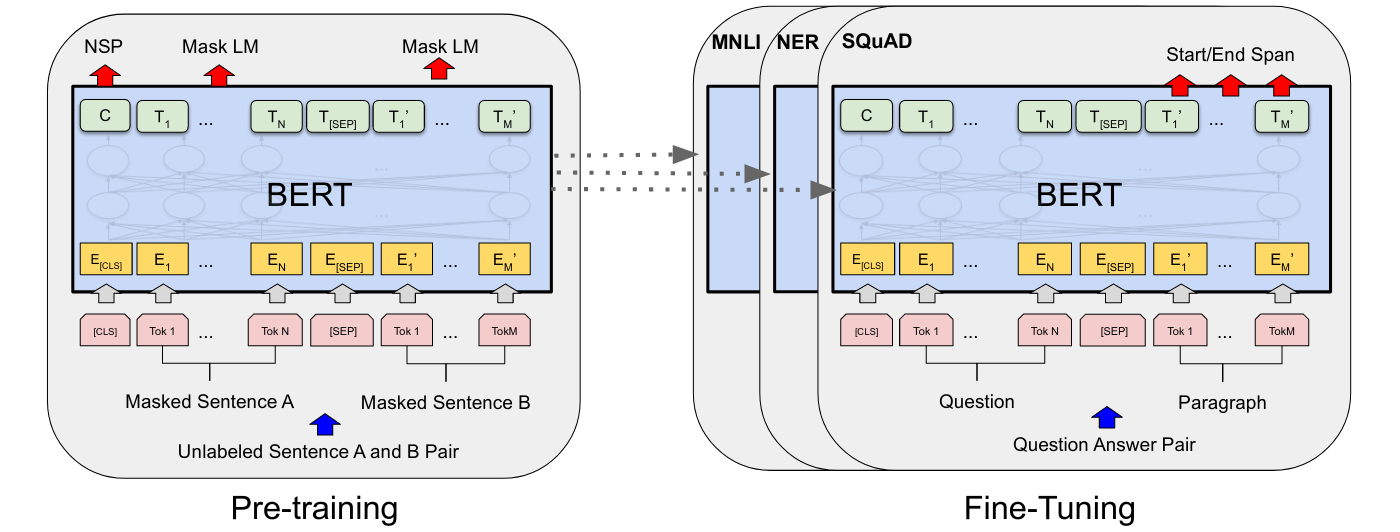

- <b>Implémentation</b>

Nous disposons de toutes les ressources nécessaires au développement de tels modèles grâce aux librairies open-source suivantes :

- HuggingFace's Transformers : Inclus les derniers modèles basés sur BERT (ex : CamemBERT, FlauBERT). Facilite leur fine-tuning et apprentissage;


- FastAI : Cette libraire utilisée dans ULMFiT permet de fine-tuner plus facilement les modèles et intègre des avancées de pointe (Slanted Triangular Learning Rate, OneCycle Policy ...);


- MultiFiT : qui présente l'implémentation de MultiFiT (une variante d'ULMFiT);


- Flair : librairie de NLP développé par Zalando Research, simple d’utilisation elle facilite l’utilisation des modèles de langage disponibles sur HuggingFace.


La principale contrainte d’une approche Deep Learning est la durée d’exécution des traitements et la nécessité de disposer de serveurs de calculs possédant des cartes graphiques (GPU).

Nous notons ici que la solution MultiFiT est plus légère que les modèles "Transformers" d'HuggingFace. En effet, ils utilisent des QRNN Bradbury et al. 2016 une variante "allégée" des LSTMs (les calculs sont plus facilement parallélisables).


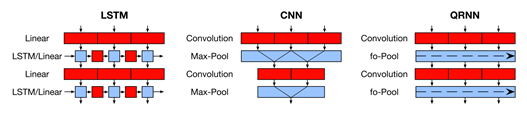

Comparaison des architectures des LSTM (Long Short-Term Memory Network), CNN (Convolutional neural network) et QRNN (Quasi-Recurrent Neural Network) de Bradbury et al. 2016.

## 2.4. Etape 2 ter : Classification de texte - Approche Combinée Multimodale

La dernière approche envisagée consiste à choisir une représentation vectorielle des champs textuels et de la combiner avec les informations normalisées des champs numériques et catégoriels. Pour ce faire, nous proposons d’utiliser un modèle multimodal basé sur les réseaux de neurones. 

La librairie fastai est très efficace pour mettre en place ce type d’architectures :

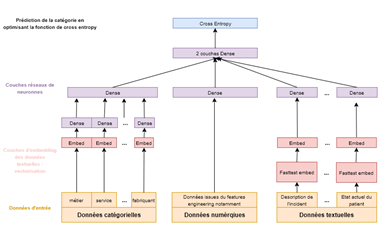

***
# <font color='blue'> 3. Classification non-supervisée de textes </font>
***

L’utilisation des méthodes de classification de l’information est devenue courante pour analyser de gros corpus de données que ce soit par exemple dans le cadre de besoins de veille scientifique ou d’analyses stratégiques de la recherche. Elles s’appuient sur la combinaison de techniques de classification automatique (supervisée ou non) et de cartographie pour visualiser le résultat. 
 
En procédant à une classification, on cherche à construire des ensembles homogènes d’individus, c'est-à-dire partageant un certain nombre de caractéristiques identiques. En outre, le clustering (ou classification non supervisée) permet de mettre en évidence ces regroupements sans connaissance a priori sur les données traitées. Si l’on considère le corpus de départ comme représentatif d’un domaine, les classes peuvent être assimilées à des thèmes de ce domaine. La classification obtenue, représentée sous forme de carte, permet alors d’avoir une vue d’ensemble du domaine traité. 

Il s'agit de réaliser une vectorisation des textes, comme dans l'approche supervisée, puis d'utiliser un algorithme de clustering de Machine Learning (K-means, Classification Hiérarchique Ascendante, ...) ou de Deep Learning pour trouver les meilleurs regroupements possibles (Clusters).

Il s'agirat ensuite de "comprendre" ce que contient chaque cluster et de faire valider la cohérence par les métiers.

## 3.1. Approche Machine Learning

In [ ]:
from sklearn.cluster import KMeans

texts = df['CleanedTweet'].loc[0:300]
target = df['Sentiment'].loc[0:300]
vectorizer = TfidfVectorizer(max_df=0.5, min_df=50)
X = vectorizer.fit_transform(texts)

modelkmeans = KMeans(n_clusters=5, init='k-means++', n_init=100)
modelkmeans.fit(tfidf_vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

## 3.2. Approche Deep Learning

Une très bonne bibliothèque pour cette tache : https://github.com/ddangelov/Top2Vec

In [ ]:
from top2vec import Top2Vec

texts = df['CleanedTweet'].loc[0:10000]

model = Top2Vec(texts, speed = 'fast-learn', workers = 6)

In [ ]:
model.get_num_topics()

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_sizes

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(4)

In [ ]:
topic_words

In [ ]:
word_scores

In [ ]:
model.generate_topic_wordcloud(0)

In [ ]:
model.generate_topic_wordcloud(3)

***
# <font color='blue'> 4. Similatité de textes </font>
***

Lorsqu’on cherche à déterminer si des textes (paragraphes ou documents) sont “similaires”. Il faut réaliser des comparaisons paire-à-paire entre l’ensemble des textes candidats (potentiellement similaires). Il est important de travailler en collaboration avec les experts métier pour comprendre, au sens métier, à quoi la notion de similarité fait-elle référence ? sur quels champs ou sections d’un document faut-il baser nos similarités ?


Dans le cas où nous disposerions d’une base d’apprentissage constituée de couples de textes similaires, nous pourrions alors mettre en place une approche supervisée. Sinon, il est possible de mettre en place une approche semi-supervisée qui nécessiterait aussi une base de textes similaires mais qui se constituerait au fur et à mesure des retours utilisateurs sur les rapprochements proposés par l’algorithme.


## 4.1. Approche supervisée

Ici, la base d’apprentissage serait constituée de l’ensemble des couples validés comme étant similaires par des experts. Elle est utilisée de manière supervisée par l’algorithme pour apprendre à calculer une distance de similarité entre deux textes. Actuellement les « Siamese Manhattan LSTM » (Siamese Recurrent Architectures for Learning Sentence Similarity) sont les réseaux siamois les plus performants sur du texte.


Cette approche est donc capable d’extraire automatiquement les vecteurs de représentation du texte nous permettant de calculer des similarités pertinentes d’un point de vue métier. En revanche, elle nécessite un corpus d’apprentissage assez volumineux.

De manière intuitive, les architectures siamoises nous offrent un moyen d’apprendre une mesure de similarité à partir de deux entrées indépendantes qui partagent une relation abstraite de similarité. Ce type d’architecture a la particularité de faire intervenir deux réseaux de neurones identiques qui prennent deux entrées indépendantes et qui se rejoignent finalement grâce à une fonction de pénalité qui se base sur une métrique (ici une distance) calculée à partir des représentations de plus haut-niveau des deux réseaux. À noter que les deux réseaux qui interviennent dans ce type d’architecture partagent les mêmes paramètres

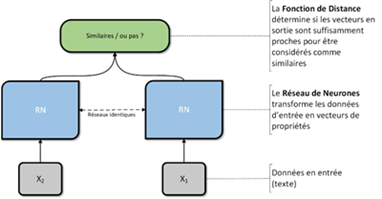

## 4.2. Approche semi-supervisée

Il s'agit ici de choisir la ou les bonnes représentations vectorielles (fixes ou contextuelles) du texte afin d’effectuer les calculs de similarité précisément sur les éléments permettant d’identifier des similarités qui soient pertinentes d’un point de vue métier. Nous pouvons imaginer combiner plusieurs représentations vectorielles pour un même texte.


Pour effectuer les rapprochements, nous proposons d’utiliser la similarité cosinus, qui est une mesure particulièrement adaptée au texte, et un algorithme du type KNN (K-Nearest Neighbors) pour la recherche des plus proches voisins d’un texte donné. Dans le cas d’une représentation à plusieurs vecteurs, il est possible soit de réaliser une intersection entre les différents ensembles issus de la recherche par similarité, soit d’agréger les différents vecteurs pour ne réaliser qu’une seule recherche des k plus proches voisins.


On obtiendrait alors des ensembles de textes considérés comme similaires par notre algorithme, nous proposerons alors aux experts métier de valider la pertinence de nos rapprochements afin de constituer une base de couples valides (ou non) nous permettant d’ajuster soit les méthodes de représentation vectorielles utilisées, soit les seuils minimums de similarité.


## 4.3. Mise à l'échelle

La mise en place d'une telle solution à l'échelle peut se faire en utilisant GNES (Generic Neural ElasticSearch), un système de recherche sémantique natif du cloud basé sur un réseau de neurones profond. Ce Framework est très puissant car il est scalable (orienté Swarn / Kubernetes), modulable et nous pouvons facilement y intégrer nos propres modèles de vectorisation (ex. : LSA/LDA, embeddings, etc.).


Même si en théorie cette solution est scalable à l’infinie, elle peut demander beaucoup de ressources, on pourrait alors envisager une méthode hybride utilisant du « re-ranking ». Cette méthode hybride repose sur un moteur de recherche sémantique tel qu'Elasticsearch et un affinage des résultats par notre algorithme. Cette approche aurait l'avantage de retourner rapidement des candidats similaires à un document grâce à la rapidité éprouvée d'Elasticsearch. Il ne resterait alors plus qu'à « re-ranker » les candidats en calculant leur similarité avec la requête de référence à l’aide de notre modèle de Machine/Deep Learning.


Par exemple, la libraire NBoost permet d'utiliser Elasticsearch et un modèle de type BERT pour faire le « re-ranking » des résultats. La librairie Birch utilise Lucene (sur lequel est basé Elasticsearch) et BERT. Cette approche est prometteuse car elle occupe le haut des classements des compétitions d'information retrieval (voir http://www.msmarco.org/leaders.aspx).


Toutefois, nous noterons que dans ce cas-là, le modèle a été « fine-tuné » sur un très large set de documents. Notre nombre de documents ne sera peut-être pas suffisant pour tirer les avantages de ce modèle. De plus, les modèles de type BERT nécessitent des GPUs pour fonctionner à pleine vitesse.


Il existe d'autres modèles de « re-ranking » qui nécessitent moins de ressources : K-NRM et Conv-KNRM. Au lieu de « re-ranker » par un modèle entrainé sur une tâche de classification binaire (le document est similaire à la requête ou non), nous pouvons utiliser un modèle de langage (« fine-tuné » sur nos documents) qui aura pour but d'exprimer la probabilité de générer le texte d'un document sachant la requête (« Relevance-Based Language Models »). Parmi ces algorithmes, la version RM3 et une des plus utilisées ; la librairie Anserini implémente ce modèle et d'autres tels que le BM25 (approche utilisée par ElasticSearch). Elle nous permettrait ainsi de comparer les performances du BM25 face à une combinaison de BM25 et RM3. Cette approche a des résultats honorables sur différents jeux de données (Yang et al, 2019).



In [ ]:
import torch
camembert = torch.hub.load('pytorch/fairseq', 'camembert')

def embed(sentence):
   tokens = camembert.encode(sentence)
   # Extract all layer's features (layer 0 is the embedding layer)
   all_layers = camembert.extract_features(tokens, return_all_hiddens=True)
   embeddings = all_layers[0]
   return embeddings

In [ ]:
u = embed(sentence="Le chat est roux")
v = embed(sentence="Le chien est roux")
cos = torch.nn.CosineSimilarity(dim=1)
cos(u.mean(axis=1), v.mean(axis=1))

In [ ]:
u = embed(sentence="Le chat est roux")
v = embed(sentence="Le petit chat est roux")

cos = torch.nn.CosineSimilarity(dim=1)
cos(u.mean(axis=1), v.mean(axis=1))

In [ ]:
u = embed(sentence="Le chien est roux")
v = embed(sentence="Le petit chien est roux")

cos = torch.nn.CosineSimilarity(dim=1)
cos(u.mean(axis=1), v.mean(axis=1))

In [ ]:
u = embed(sentence="Le chat est roux")
v = embed(sentence="La licorne est rose")

cos = torch.nn.CosineSimilarity(dim=1)
cos(u.mean(axis=1), v.mean(axis=1))

In [ ]:
u = embed(sentence="Le chat est roux")
v = embed(sentence="La voiture est grande")

cos = torch.nn.CosineSimilarity(dim=1)
cos(u.mean(axis=1), v.mean(axis=1))

In [ ]:
u = embed(sentence="Le chat est roux")
v = embed(sentence="Pierre et Paul sont allés au marché")

cos = torch.nn.CosineSimilarity(dim=1)
cos(u.mean(axis=1), v.mean(axis=1))

***
# <font color='blue'> 5. Extraction d'entités nommées - de relations et réconciliation </font>
***

## 5.1. Extraction d'entités


Il s’agit ici d’extraire automatiquement les entités (mots ou groupe de mots) présentes dans la séquence des mots d'une phrase (Exemple : Personne, Entreprise, Lieux, etc.). Pour ce faire, nous pouvons mettre en place des modèles de NER (Named Entity Recognition). Ces modèles sont supervisés et nécessitent donc souvent la mise en place d’un outil d’annotation pour constituer une base d’apprentissage de documents annotés précisément au niveau des mots.

Nous proposons une approche basée sur les réseaux de neurones Bi-LSTM avec une couche CRF (qui tient compte de l'aspect séquentiel d'une phrase : la prédiction faite au mot m-1 est prise en compte pour prédire si le mot m est une entité). Ces modèles représentaient il y a encore peu de temps l’état de l’art, il existe aujourd’hui des variantes utilisant par exemple une approche de pré-entrainement. L’architecture de notre réseau peut être décomposée en 3 parties :

- Couche de représentation vectorielle : Une représentation des mots à partir des lettres (Character-based Bi-LSTM layer)et une représentation contextuelle des mots (Word Based Bi-LSTM layer) : Elle permet de représenter chaque mot en fonction des mots du contexte ;


- Couche d'encodage Bi-LSTM ;


- Couche de décodage (CRF layer) : elle permet d’attribuer un label à la représentation vectorielle de chaque mot ;



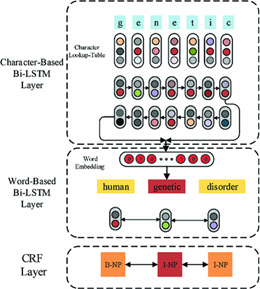

Depuis 2018, les embeddings dit contextualisés permettent d'améliorer les résultats des NER.
Un article récent « CamemBERT: a Tasty French Language Model » (Martin et al. 2019) montre qu'un modèle NER basé sur une version de BERT apprise uniquement sur des textes en français permet d'atteindre de meilleurs résultats que le modèle que nous avons présenté ci-dessus. Toutefois ce modèle peut être très lourd en termes de calculs. 


Pour le développement de ces modèles plusieurs librairies open-source peuvent nous aider :
    
    
- <b>SpaCy</b> : Libraire de NLP robuste avec des fonctions de traitement en pipeline. Supporte la langue française.
    
    
- <b>Flair</b> : Librairies de NLP avec des résultats de pointe sur les NER. Permet de mixer facilement différents embeddings. Contient des modèles NER et embeddings (ELMo, BERT, Flair) pré-entrainés en français.

    
- <b>AllenNLP</b> : Des modèles de pointes partagés, modulables. Pas de modèles pré-entrainés en français.
    
    
- <b>HuggingFace Transformers</b>  : Inclus les derniers modèles basés sur BERT (ex : CamemBERT). Facilite leur fine-tuning et l’apprentissage.


In [ ]:
import pandas as pd
import io
import glob
import spacy
import numpy as np
from langdetect import detect
# python -m spacy download en_core_web_md
import en_core_web_md

In [ ]:
nlp = en_core_web_md.load()

liste_LOC = []  
for dos in df['CleanedTweet'].loc[0:1000]:
   doc = nlp(dos)
   for word in doc.ents:    
      if len(word.text) > 3:
         if (word.label_ == 'LOC'):
            liste_LOC.append(word.text)



liste_LOC = list(set(liste_LOC)) 

In [ ]:
liste_LOC

***

## 5.2. Extraction des relations

Il s’agit ici d’extraire les relations entre ces entités. La liste des types de relations sera définie en amont avec le métier (ex : est causé par, est une filière de, etc.). À cette étape les données auront été annotées (les entités extraites précédemment seront reliées entre elles par des liens, le type de la relation sera également annotée) et nous serons donc dans un cadre supervisé d’extraction de relations. L’extraction de relation consiste à sélectionner les phrases contenant des entités différentes au sein d’un même texte et à classifier leur relation selon la liste prédéfinie.


Deux options se présentent :


- Nous avons suffisamment d'exemples de phrases annotées pour les différentes relations. Aujourd'hui l'état de l'art dans ce domaine repose sur des résolutions conjointes entre la détection d'entités et l'extraction de relation. Comme pour les NER, l'état de l'art est dominé par des approches reposant sur des réseaux de neurones :

> HMTL (Sanh et al. 2018) : Ce modèle dispose d’une implémentation Pytorch en open-source ;

> Dynamic Span Graphs (Luan et al. 2019). Ce modèle dispose d’une bibliothèque Python ;

> La librairie OpenNRE permet de tester facilement des modèles d'extraction neuronaux. 


- Nous n'avons pas assez de données annotées par relation, nous pensons à une approche "few shot learning". Ce framework d'apprentissage permet d'obtenir des résultats robustes avec peu d'exemples. Des modèles spécialisés ont été développés sur le dataset FewRel. Nous disposons donc d'une implémentation open-source de départ. Les modèles les plus performants reposent sur une architecture BERT. Nous pourrons ici tirer l'avantage du modèle spécialisé pour le français (CamenBERT).


***

## 5.3. Algorithme de réconciliation

La solution se base sur un module de coréférence pour identifier les alias et sur un module d’entity linking pour la normalisation des termes.


<b>Coréférences</b> :  Il s'agit ici de mettre en place un modèle de résolution de coréférences. Cela consiste à rechercher toutes les expressions faisant référence à la même entité dans un texte. Il s'agit d'une étape importante pour de nombreuses tâches du NLP. La résolution de coréférence neuronale de bout en bout (Lee et al. 2017) est un modèle, basé sur les réseaux de neurones, qui représentait l'état de l'art en 2017. Depuis, ce modèle a été amélioré (Lee et al. 2018) et des modèles basés sur le modèle BERT occupent désormais le haut des classements dans les compétitions de résolution de coréférence. Nous retrouvons des modèles end-to-end implémentés tel que le modèle HMTL déjà mentionné ou dans des libraires comme AllenNLP. Il est également possible d'entraîner un modèle sur nos propres données avec le plugin neuralcoref de SpaCy.


<b>Entity Linking</b> : Cette technique permet de relier des entités à des bases de connaissance existantes, en s’assurant de retourner la bonne entité lorsqu’il existe plusieurs candidats dans la base de référence. Par exemple, si nous détectons l'entité “Jaguar” grâce au NER, nous voulons la lier à la voiture dans la base de connaissance sans qu’il y ait confusion avec l’animal. 


Le pipeline d’entity linking sera :

1.	Détection de l’entité par un NER ;


2.	Récupération des candidats dans la base de connaissances ;


3.	Désambiguïsation pour sélectionner l’entité de la base qui correspond le mieux à l’entité trouvée en 1.


Différentes approches existent :

- <b>Approche Graphe</b> : Il existe deux principaux modèles se basant sur des algorithmes de graphes MAG et Babelfy. Ces algorithmes se basent sur des mesures de cohérence, ils ont l’avantage de ne pas nécessiter un entraînement sur des données spécifiques. De plus, ils sont « multilingues » par nature.


Fonctionnement d’un algorithme d’entity linking basé sur un graphe :

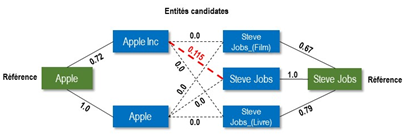

- <b>Approche par similarité vectorielle</b> : Nous pouvons imaginer une approche non supervisée basée sur des réseaux de neurones. Le but est d’apprendre une représentation vectorielle (embeddings) de l’entité extraite à partir du contexte dans lequel elle apparaît afin de la relier avec l’entité de référence dans la base de connaissance (pour laquelle on a également appris une représentation vectorielle basée sur sa description, par exemple un article Wikipedia). On calcule alors la similarité cosinus entre l’entité et les différentes références candidates et on l’associe à la référence ayant la plus grande similarité. On peut également ajouter le type symbolique associé à l’entité (que nous aurions récupéré avec le NER) afin d’améliorer ce rapprochement.

***
# <font color='blue'> 6. Service de Question-Réponse </font>
***

In [ ]:
# pip3 install --user transformers==3.0.2
import transformers

In [ ]:
from transformers import pipeline

nlp = pipeline('question-answering', model='fmikaelian/camembert-base-fquad', tokenizer='fmikaelian/camembert-base-fquad')

nlp({
    'question': "Qui est Claude Monet?",
    'context': "Claude Monet, né le 14 novembre 1840 à Paris et mort le 5 décembre 1926 à Giverny, est un peintre français et l’un des fondateurs de l'impressionnisme."
    })

https://huggingface.co/etalab-ia/camembert-base-squadFR-fquad-piaf